<a href="https://colab.research.google.com/github/23f1002944/EDA-Probability-Distributions/blob/main/EDA_Uniform_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Uniform Distribution
So we will import a birthday dataset from Kaggle, basically the number of birthdays on each day should be same and following a uniform distribution

In [21]:
import kagglehub
path = kagglehub.dataset_download("ayessa/birthday")
bday = pd.read_csv(path+"/US_births_2000-2014_SSA.csv")
bday

,year,month,date_of_month,day_of_week,births,date
0,2000.0,1.0,1.0,6.0,9083.0,1/1/2000
1,2000.0,1.0,2.0,7.0,8006.0,1/2/2000
2,2000.0,1.0,3.0,1.0,11363.0,1/3/2000
3,2000.0,1.0,4.0,2.0,13032.0,1/4/2000
4,2000.0,1.0,5.0,3.0,12558.0,1/5/2000
...,...,...,...,...,...,...
9525,NaN,NaN,NaN,NaN,NaN,NaN
9526,NaN,NaN,NaN,NaN,NaN,NaN
9527,NaN,NaN,NaN,NaN,NaN,NaN
9528,NaN,NaN,NaN,NaN,NaN,NaN


We have loaded the csv into dataframe, now we will analyse the data

In [22]:
bday.describe()

,year,month,date_of_month,day_of_week,births
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2006.999270,6.522723,15.730243,3.999817,11350.068261
std,4.321085,3.449075,8.801151,2.000502,2325.821049
min,2000.000000,1.000000,1.000000,1.000000,5728.000000
25%,2003.000000,4.000000,8.000000,2.000000,8740.000000
50%,2007.000000,7.000000,16.000000,4.000000,12343.000000
75%,2011.000000,10.000000,23.000000,6.000000,13082.000000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


In [23]:
are_all_null = bday.iloc[5479:].isnull().all().all()

if are_all_null:
    print("All values after row 5479 are null.")
else:
    print("Not all values after row 5479 are null.")

All values after row 5479 are null.


In [24]:
bday = bday.iloc[:5479].copy()
display(bday.tail())

,year,month,date_of_month,day_of_week,births,date
5474,2014.0,12.0,27.0,6.0,8656.0,12/27/2014
5475,2014.0,12.0,28.0,7.0,7724.0,12/28/2014
5476,2014.0,12.0,29.0,1.0,12811.0,12/29/2014
5477,2014.0,12.0,30.0,2.0,13634.0,12/30/2014
5478,2014.0,12.0,31.0,3.0,11990.0,12/31/2014


In [25]:
bday.describe()

,year,month,date_of_month,day_of_week,births
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2006.999270,6.522723,15.730243,3.999817,11350.068261
std,4.321085,3.449075,8.801151,2.000502,2325.821049
min,2000.000000,1.000000,1.000000,1.000000,5728.000000
25%,2003.000000,4.000000,8.000000,2.000000,8740.000000
50%,2007.000000,7.000000,16.000000,4.000000,12343.000000
75%,2011.000000,10.000000,23.000000,6.000000,13082.000000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


In [26]:
#grouping by total bdays by their month
monthly_births = bday.groupby('month')['births'].sum()
bday['total_monthly_births'] = bday['month'].map(monthly_births)
display(bday.head())

,year,month,date_of_month,day_of_week,births,date,total_monthly_births
0,2000.0,1.0,1.0,6.0,9083.0,1/1/2000,5072588.0
1,2000.0,1.0,2.0,7.0,8006.0,1/2/2000,5072588.0
2,2000.0,1.0,3.0,1.0,11363.0,1/3/2000,5072588.0
3,2000.0,1.0,4.0,2.0,13032.0,1/4/2000,5072588.0
4,2000.0,1.0,5.0,3.0,12558.0,1/5/2000,5072588.0


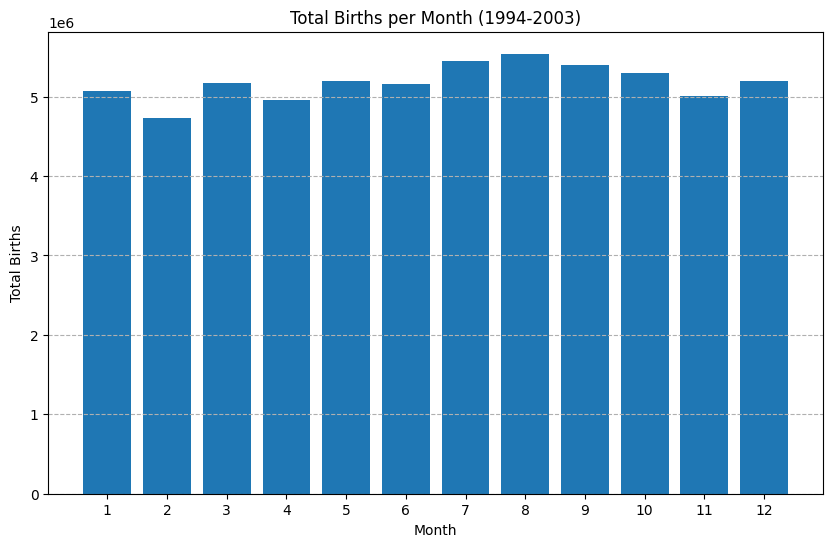

In [27]:
# Create a bar chart of total monthly births vs their month
monthly_births_sorted = monthly_births.sort_index()
plt.figure(figsize=(10, 6))
plt.bar(monthly_births_sorted.index, monthly_births_sorted.values)
plt.xlabel('Month')
plt.ylabel('Total Births')
plt.title('Total Births per Month (1994-2003)')
plt.xticks(monthly_births_sorted.index)
plt.grid(axis='y', linestyle='--')
plt.show()

Clearly we can see that it follows a discrete uniform distribution, but still we have some variations in the bdays from February to August

The **most popular month for weddings in the US is October**, consistently ranking as the busiest month with around 17% of weddings. September is the second most popular month

Considering an average pregnancy takes 9 months, most births should be in June, there might be a buffer of 2-3 months, which ultimately explains why most amount of births happen from July to September

# Generating a Uniform Continuous Distribution also-
each day birth frequency plotted

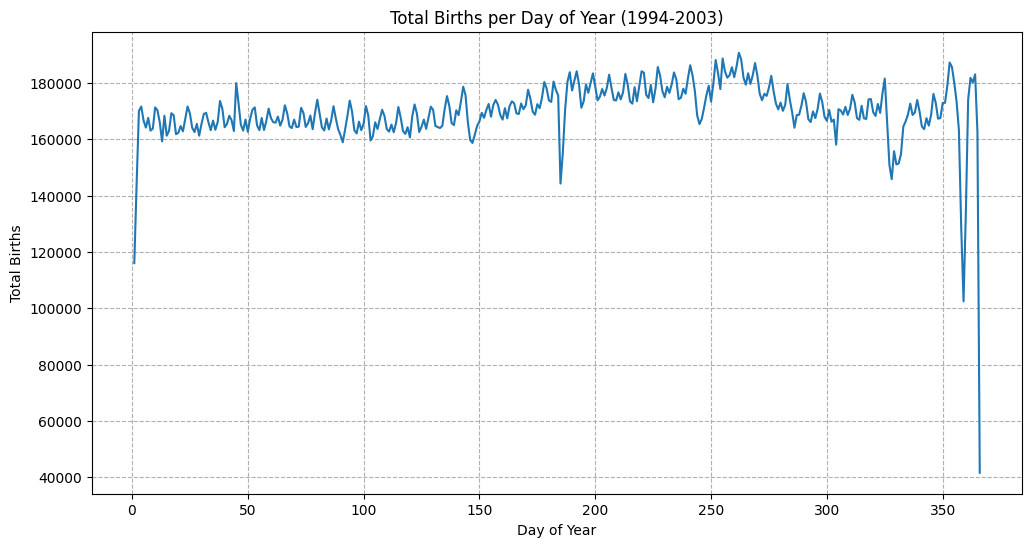

In [28]:
bday['date'] = pd.to_datetime(bday['date'], format='%m/%d/%Y')
bday['day_of_year'] = bday['date'].dt.dayofyear
daily_births = bday.groupby('day_of_year')['births'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_births.index, daily_births.values)
plt.xlabel('Day of Year')
plt.ylabel('Total Births')
plt.title('Total Births per Day of Year (1994-2003)')
plt.grid(True, linestyle='--')
plt.show()

# Bernoulli Distribution
It is very simple, we do not need any real world data for this, instead we can simulate a coin toss experiment and generate the graph

In [31]:
import pandas as pd

probability_of_heads = 0.3
number_of_samples = 1000
coin_toss_results = np.random.choice(['Heads', 'Tails'], size=number_of_samples, p=[probability_of_heads, 1 - probability_of_heads])

results_counts = pd.Series(coin_toss_results).value_counts()
display(results_counts)

,count
Tails,732
Heads,268


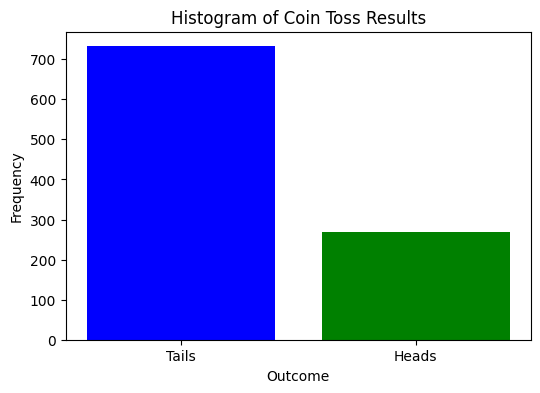

In [32]:
plt.figure(figsize=(6, 4))
plt.bar(results_counts.index, results_counts.values, color=['blue', 'green'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Coin Toss Results')
plt.show()

Clearly we can see above that p = 0.3 for our baised coin and 1-p = 0.7 for our tails and the frequency matches that in the histogram

*One thing we notice here is that, we do not need to calculate PMF/PDF, we can directly plot frequency as the underlying distribution will be the same when scaled/translated so it doesn't matter*

# Binomial Distribution
It is basically sum of n independent bernoulli, so it means we can find number of n favourable outcomes in N different samplings, in a single sampling probability was p and 1-p, but in N samplings, it is multiply, and basically most of the values will lie in the centre of the distribution

Let's demonstrate that with a quality control example

In [34]:
import kagglehub

# Download latest version
path2 = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")

print("Path to dataset files:", path2)

100%|██████████| 2.71M/2.71M [00:00<00:00, 4.25MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/teejmahal20/airline-passenger-satisfaction/versions/1


In [37]:
test=pd.read_csv(path2+"/test.csv")
train=pd.read_csv(path2+"/train.csv")
test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


So above we have a flight satisfaction survey, we can model this into Binomial in this way= The number of people having good satisfaction rating in 25000 samples

We can also find the bernoulli distribution in this case, let's do both


Probability of 'satisfied' P: 0.4333


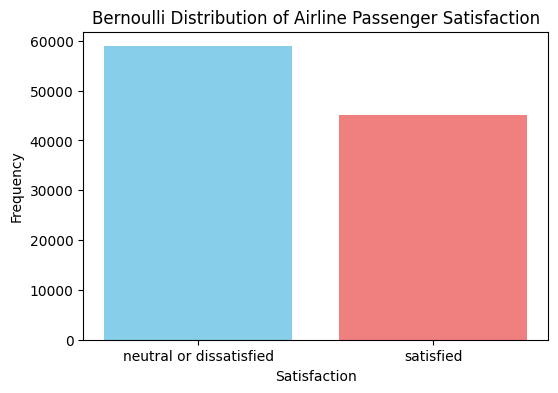

In [44]:
airline = train.copy()

satisfaction_counts = airline['satisfaction'].value_counts()

probability_satisfied = satisfaction_counts['satisfied'] / len(airline)

print(f"\nProbability of 'satisfied' P: {probability_satisfied:.4f}")

# Plot the frequency distribution
plt.figure(figsize=(6, 4))
plt.bar(satisfaction_counts.index, satisfaction_counts.values, color=['skyblue', 'lightcoral'])
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.title('Bernoulli Distribution of Airline Passenger Satisfaction')
plt.show()

Now we plot the Binomial distribution, given p =0.4333, what is the probability of having 500 people satisfied in total around 25000 samplings

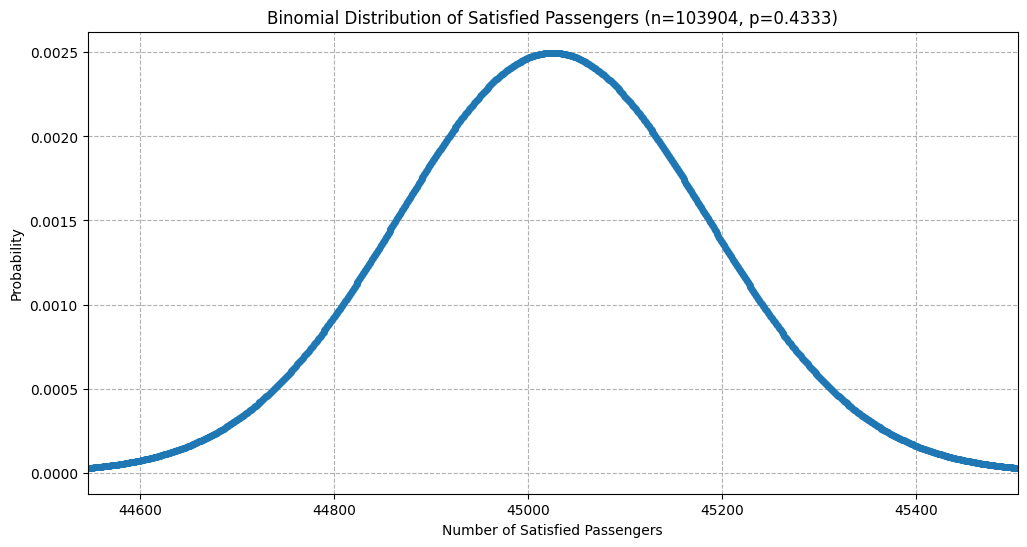

103904


In [47]:
from scipy.stats import binom
n = len(airline)

p = probability_satisfied #P of success as per bernoulli

# Define the range of possible number of satisfied passengers
k = np.arange(0, n + 1)

# Calculate the probability mass function (PMF)
binomial_pmf = binom.pmf(k, n, p)

# Plot the binomial distribution
plt.figure(figsize=(12, 6))
plt.plot(k, binomial_pmf, marker='o', linestyle='-', markersize=4)
plt.xlabel('Number of Satisfied Passengers')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution of Satisfied Passengers (n={n}, p={p:.4f})')
plt.grid(True, linestyle='--')
plt.xlim([n * p - 3*np.sqrt(n*p*(1-p)), n*p + 3*np.sqrt(n*p*(1-p))])
plt.show()

print(n)

**Total Passengers** = 103904

**Satisfied passengers** = 45025

**Dissatisfied passengers** = 58879

In the above plot, we plotted the Binomial Distribution for the number of Satisfied Passengers in 103904 Flights

And the highest chance of satisfied passengers was around 45000 from the graph, as probability lies near the centre of the curve, since p = 0.433 and also we have Central Limit Theorem

*One thing to note here is that the Binomial Graph of number of passengers dissatisfied in total n number of trials will be different, we can plot it below*

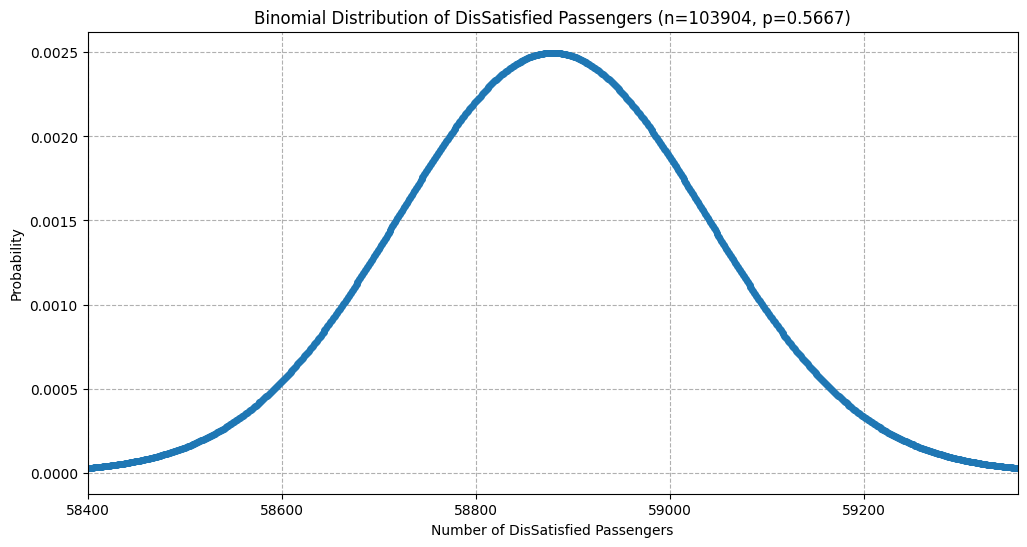

In [50]:
p = 1-probability_satisfied #P of success as per bernoulli

# Define the range of possible number of satisfied passengers
k = np.arange(0, n + 1)

# Calculate the probability mass function (PMF)
binomial_pmf = binom.pmf(k, n, p)

# Plot the binomial distribution
plt.figure(figsize=(12, 6))
plt.plot(k, binomial_pmf, marker='o', linestyle='-', markersize=4)
plt.xlabel('Number of DisSatisfied Passengers')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution of DisSatisfied Passengers (n={n}, p={p:.4f})')
plt.grid(True, linestyle='--')
plt.xlim([n * p - 3*np.sqrt(n*p*(1-p)), n*p + 3*np.sqrt(n*p*(1-p))])
plt.show()

See, it is mean around 58000, means these number of passengers are most likely to be dissatisfied

Binomial can be handy in cases when we have to count the number of expected success in N different trials